# **SOLUCION DE ECUACIONES NO LINEALES**

Llamamos sistema no lineal a un sistema de ecuaciones en el que una o ambas de las ecuaciones que forman el sistema es una ecuación no lineal, es decir, cuando alguna de las incógnitas que forman parte de la ecuación no son de primer grado.

## **Ejercicio 3: Solucion de Ecuaciones no Lineales**

## Descripción del Ejercicio

# C: Para el estudio de vibraciones forzadas, no amortizadas, aparece la función  $$h(x) = xsenx $$

* Halle el menor valor positivo de x, tal que h(x) = 1 

## Tabla gráfica 

In [3]:
from math import sin
x = 1
Funcion = 0
print('{:^15}{:^15}'.format('x','h(x)'))
for i in range(20):
    funcion = x * sin(x)
    x = x + 1
    print('{:^15}{:^15.10f}'.format(x - 1, funcion))

       x            h(x)      
       1        0.8414709848  
       2        1.8185948537  
       3        0.4233600242  
       4        -3.0272099812 
       5        -4.7946213733 
       6        -1.6764929892 
       7        4.5989061910  
       8        7.9148659730  
       9        3.7090663672  
      10        -5.4402111089 
      11       -10.9998922721 
      12        -6.4388750160 
      13        5.4621714787  
      14        13.8685029797 
      15        9.7543176024  
      16        -4.6064530666 
      17       -16.3437573620 
      18       -13.5177704419 
      19        2.8476669836  
      20        18.2589050146 


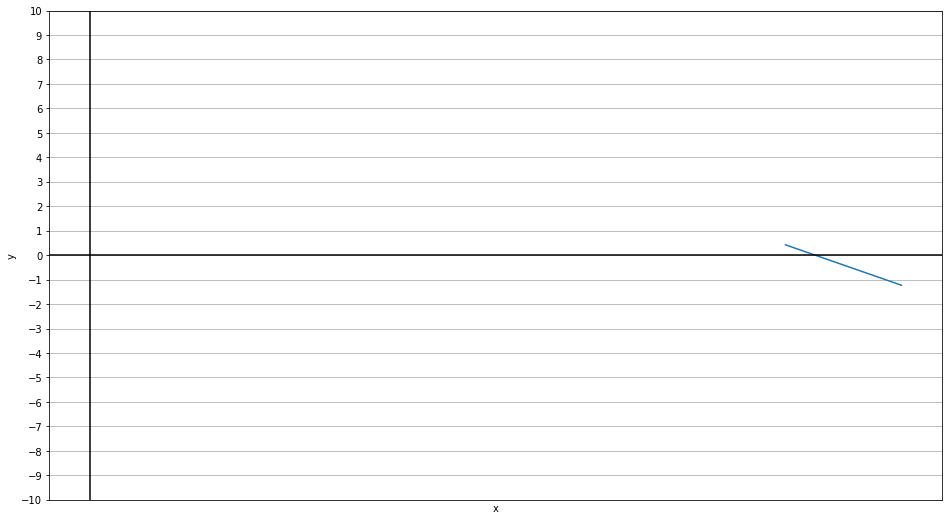

In [4]:
from matplotlib import pyplot
from numpy import arange
from math import  sin
pyplot.figure(figsize=(16,9))    # Tamaño de la imagen

# funcion para evaluar

def h(x):
    return x * sin(x)

x = arange(3,4,0.5)           # Valores donde esta la raíz
pyplot.ylim(-10,10)             # Limitación de valores del eje y


# Grafico de h.
pyplot.plot(x,[h(i) for i in x])

# Ajuste de los intervalos de los ejes 'x'y'y'
pyplot.xticks(arange(10, max(x)+1, 1))
pyplot.yticks(arange(-10, 10 + 1, 1))

# Ejes
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
pyplot.ylabel('y')
pyplot.xlabel('x')

pyplot.grid()                  # muestra la cuadricula





# Aproximación de raices

Métodos para aproximar raices de ecuaciones

* Bisección
* Regula felsi
* Newton - Raphson
* Seante 

# **Metodo de Biseción**

* Si $ f(R{i}) f(R{d}) < 0, la raíz se encuentra en el intervalo [R{i}, R{d}] $
* Si $ f(R{i}) f(R{d}) > 0, la raíz se encuentra en el intervalo [R{i}, R{d}] $


Aproximación de la raiz $$ R{n} =\frac{ \ R{i} + R{d}}{2} $$

Error relativo $$ |\frac{ \ R{n} - R{n} - 1}{R{n}}* 100|  $$

In [5]:
Ri = 3
Rr = 7/2
Rs = 4
i = 0
Er = 0
Rra = 0

def h(x):
    return x * sin(x)

# Funcion para calcular el error relativo
def error(Rra, Rrn):
    Erel = abs((Rrn - Rra) / Rrn) * 100
    return Erel

print('{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}'.format('# iter','Ri','Rs','Rr','h(Ri)','Erel(%)'))

while (i < 10):
    Er = error(Rra,Rr)
    Rra = Rr                       # Rra será el Rr anterior para determinar el error relativo

    if h(Ri) * h(Rr) < 0:
          Rs = Rr
    elif h(Ri) * h(Rr) > 0:
          Ri = Rr
    elif (Rr) == 0:
        print('La raíz es:', Rr)

    Rr = (Ri + Rs) / 2
    i = i + 1

    # Condicional para el primer Error relativo
    if i == 1:
      print('{:^15}{:^15.6f}{:^15.6f}{:^15.6f}{:^15.6f}'.format(i-1,Ri,Rs,Rr,h(Rr)))
    elif i > 1:
      print('{:^15}{:^15.6f}{:^15.6f}{:^15.6f}{:^15.6f}{:^25.10f}'.format(i-1,Ri,Rs,Rr,h(Rr),Er))
      




    # iter           Ri             Rs             Rr            h(Ri)         Erel(%)    
       0          3.000000       3.500000       3.250000       -0.351634   
       1          3.000000       3.250000       3.125000       0.051850          7.6923076923       
       2          3.125000       3.250000       3.187500       -0.146278         4.0000000000       
       3          3.125000       3.187500       3.156250       -0.046261         1.9607843137       
       4          3.125000       3.156250       3.140625       0.003039          0.9900990099       
       5          3.140625       3.156250       3.148438       -0.021550         0.4975124378       
       6          3.140625       3.148438       3.144531       -0.009240         0.2481389578       
       7          3.140625       3.144531       3.142578       -0.003097         0.1242236025       
       8          3.140625       3.142578       3.141602       -0.000028         0.0621504040       
       9          3.14062

# Regula Falsi

A partir de un intervalo $[a{k},b{k}]$ se calcula un punto inferior 

$$ C_{k} =\frac{ \ f(b_{k})a_{k} - f(a_{k})b_{k}}{f(b_{k}) f(a_{k})} $$

Este punto es la intersección de la recta que pasa por $(a,f(a_{k})) y (b,f(b{_k})) $ con el eje x

Si $f(C_{k})$ es suficientemente pequeño es la raíz buscada, si no se btoma el intervalo $[a_{k+1}, b_{k+1}] $ donde $[a_{k},c_{k}]$ si $f(a_{k})f(c_{k})<0$ en caso contrario $[c_{k},b_{k}]$

In [6]:
Ri = 3
Rr = 4
i = 0
Er = 0

def h(x):
    return x * sin(x)

# Funcion para calcular el error relativo
def error(Rra, Rrn):
    Erel = abs((Rrn - Rra) / Rrn) * 100
    return Erel

print('{:^15}{:^15}{:^15}{:^15}{:^15}{:^25}'.format('# iter','Ri','Rs','Rr','h(Ri)','Erel(%)'))

while (i < 11):
    Er = error(Rra,Rr)
    Rra = Rr                       # Rra será el Rr anterior para determinar el error relativo

    if h(Ri) * h(Rr) < 0:
          Rs = Rr
    elif h(Ri) * h(Rr) > 0:
          Ri = Rr
    elif (Rr) == 0:
        print('La raíz es:', Rr)

    Rr = (h(Rs) * Ri - h(Ri) * Rs) / (h(Rs) - h(Ri))
    i = i + 1

    # Condicional para el primer Error relativo
    if i == 1:
      print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}'.format(i-1,Ri,Rs,Rr,h(Rr)))
    elif i > 1:
      print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}'.format(i-1,Ri,Rs,Rr,h(Rr),Er))

    # iter           Ri             Rs             Rr            h(Ri)              Erel(%)         
       0        3.0000000000   4.0000000000   3.1226927793   0.0590149874  
       1        3.1226927793   4.0000000000   3.1394687030   0.0066680714   28.0945735840 
       2        3.1394687030   4.0000000000   3.1413600394   0.0007307248   0.5343555000  
       3        3.1413600394   4.0000000000   3.1415672527   0.0000797986   0.0602075667  
       4        3.1415672527   4.0000000000   3.1415898808   0.0000087110   0.0065958566  
       5        3.1415898808   4.0000000000   3.1415923509   0.0000009509   0.0007202742  
       6        3.1415923509   4.0000000000   3.1415926206   0.0000001038   0.0000786270  
       7        3.1415926206   4.0000000000   3.1415926500   0.0000000113   0.0000085828  
       8        3.1415926500   4.0000000000   3.1415926532   0.0000000012   0.0000009369  
       9        3.1415926532   4.0000000000   3.1415926535   0.0000000001   0.0000001023  
    

# **Método de Newton - Raphson**

Para que sea efectivo es necesario seleccionar un valor inicial cerca de la raíz.  Se halla la recta tangente en el valor inicial. La intersección de la rect tangente con el eje x es la aproximación de la raíz.  $$ R_{i+1} = R_{i} - \frac{ \ f(R_{i})}{f(R_{i})} $$


In [7]:
from sympy.interactive import printing
from sympy import Derivative, diff, sympify, symbols
printing.init_printing(use_latex = "mathjax")

# Calculo de la primera derivada de h

x = symbols ('x')
Derivative('x * sin(x)', x, 1).doit()

x⋅cos(x) + sin(x)

In [8]:
from math import sin

Ri = 3
Rr = 4
i = 0
Er = 0

def F(n):
    return x * sin(x)

def Dh(x):
  dh = ((x * sin(x)) / sin(x)) + (sin(x))
  return dh

# Funcion para calcular el error relativo
def error(Rra, Rrn):
    Erel = abs((Rrn - Rra) / Rrn) * 100
    return Erel

print('{:^15}{:^15}{:^20}{:^20}'.format('# iter','Ri','h(Ri)','Erel(%)'))

while (i < 11):
    Er = error(Rra,Rr)
    Rra = Rr                       # Rra será el Rr anterior para determinar el error relativo
    Rr = Ri - (h(Ri) / (Dh(Ri)))
    # Condicional para el primer Error relativo
    if i == 0:
      print ('{:^15}{:^15.10f}{:^20.15f}'.format(i,Ri,Rr))
    elif i > 1:
      print ('{:^15}{:^15.10f}{:^20.7f}{:^12.7f}'.format(i-1,Ri,h(Rr),Er))
    Ri = Rr
    i = i + 1  

    # iter           Ri              h(Ri)              Erel(%)       
       0        3.0000000000   2.865220041547826  
       1        2.6160791277       1.7810199       9.5234472  
       2        2.1951406575       1.6019303       19.1759225 
       3        1.6027483681       0.8237377       36.9610290 
       4        0.9871512082       0.2727148       62.3609792 
       5        0.5349482803       0.0740939       84.5320837 
       6        0.2739134528       0.0189330       95.2982867 
       7        0.1378151727       0.0047595       98.7542064 
       8        0.0690167190       0.0011915       99.6837501 
       9        0.0345220595       0.0002980       99.9206304 


# Método Secante

A partir de un intervalo $[a_{k}, b_{k}]$ se calcula un punto interior  
$$ C_{k} =\frac{ \ f(b_{k})a_{k} - f(a_{k})b_{k}}{f(b_{k}) f(a_{k})} $$

Este punto es la intersección de la recta que pasa por $(a,f(a_{k}))$ y $(b,f(b_{k}))$ con el eje x

In [9]:
from math import sin

Ri_1 = 4
Ri = 3
Rr = 4
i = 0
Er = 0
Rra = 0

def h(x):
    return x * sin(x)

# Funcion para calcular el error relativo
def error(Rra, Rrn):
    Erel = abs((Rrn - Rra) / Rrn) * 100
    return Erel

print('{:^15}{:^15}{:^15}{:^15}{:^15}{:^25}'.format('# iter','Ri','Rs','Rr','h(Ri)','Erel(%)'))

while (i < 11):
    Er = error(Rra,Rr)
    Rra = Rr                       # Rra será el Rr anterior para determinar el error relativo
    Rr = Ri - ((h(Ri) * (Ri_1 - Ri)) / ((h(Ri_1)) - (h(Ri))))
    i = i + 1 
    if i == 1:
      print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}'.format(i-1,Ri,Rs,Rr,h(Rr)))
    elif i > 1:
      print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}'.format(i-1,Ri,Rs,Rr,h(Rr),Er))

    
  

    

    # iter           Ri             Rs             Rr            h(Ri)              Erel(%)         
       0        3.0000000000   4.0000000000   3.1226927793  
       1        3.0000000000   4.0000000000   3.1226927793   0.0590149874   28.0945735840 
       2        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       3        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       4        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       5        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       6        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       7        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       8        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
       9        3.0000000000   4.0000000000   3.1226927793   0.0590149874   0.0000000000  
      10        3.0

# **Gráfica Número de Iteraciones vs Erel %**

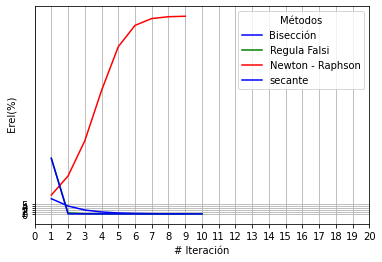

In [11]:
from matplotlib import pyplot
from numpy import arange

pyplot.plot([None, 7.6923076923, 4.0000000000, 1.9607843137, 0.9900990099, 0.4975124378, 0.2481389578 , 0.1242236025, 0.0621504040, 0.0310848617],color = 'b', label = "Bisección")
pyplot.plot([None, 28.0945735840, 0.5343555000, 0.0602075667, 0.0065958566, 0.0007202742, 0.0000786270, 0.0000085828, 0.0000009369, 0.0000001023, 0.0000000112],color = 'g', label = "Regula Falsi")
pyplot.plot([None, 9.5234472, 19.1759225, 36.9610290, 62.3609792, 84.5320837, 95.2982867, 98.7542064, 99.6837501, 99.9206304],color = 'r', label = "Newton - Raphson")
pyplot.plot([None, 28.0945735840 , 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,0.0000000000],color = 'b', label = "secante")

pyplot.xlabel ('# Iteración')
pyplot.ylabel (' Erel(%)')

pyplot.legend(loc="upper right", title='Métodos', frameon = True)


#Ajuste de los intervalos de los ejes 'x' y 'y'
pyplot.xticks(arange(0, 20 + 1, 1))
pyplot.yticks(arange(0, 5 + 1, 1))

pyplot.grid()          # Muestra la cuadricula
pyplot.show()



